# Visualize Results

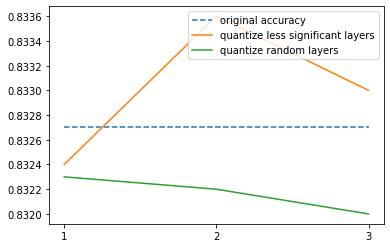

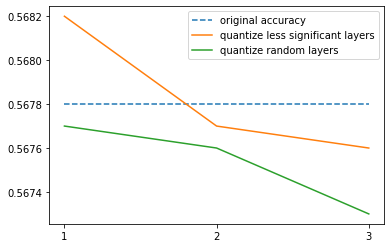

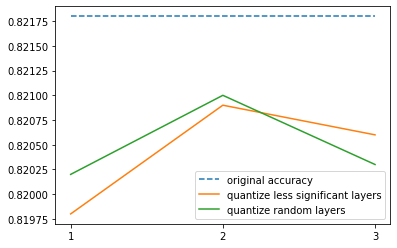

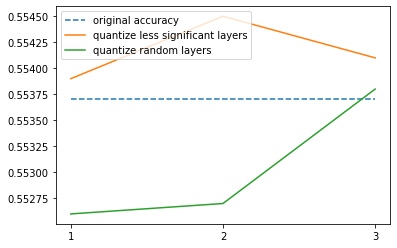

,model,num_layers,ori_test_acc,test_acc,model_size,q_model_size,ori_macs,q_macs,ori_params,q_params
0,vgg19_cifar100,15,0.5537,0.5522,574679163,521841177,1.963211e+10,5.861059e+08,143667240.0,126002664.0
1,vgg19_cifar100,16,0.5537,0.5522,574679163,514775507,1.963211e+10,1.236838e+08,143667240.0,123642856.0
2,vgg19_cifar100,-1,0.5537,0.5532,574679163,567614171,1.963211e+10,1.916969e+10,143667240.0,141307432.0


In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris 
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np 
from pandas.plotting import table
from glob import glob
import os, json

data_paths = glob("path/to/pca_based_result")
data_paths.sort()

random_data_paths = glob("path/to/random_result")
random_data_paths.sort()


data = []
save_dir = "dir/to/save"

for data_path, random_data_path in zip(data_paths, random_data_paths):
    with open(data_path) as f:
        json_data = json.load(f)
        
    with open(random_data_path) as rf:
        random_json_data = json.load(rf)

    model_name = os.path.basename(data_path).split(".")[0]
    d = [[model_name, list(x.keys())[0]] + list(x.values())[0] for x in json_data]
    data += d
    
    ori_accs = [list(x.values())[0][0] for x in json_data]
    new_accs = [list(x.values())[0][1] for x in json_data]
    random_accs = [list(x.values())[0][1] for x in random_json_data]
    
    less_to_high = new_accs
    layer_counts = list(range(1, len(ori_accs)+1))
    
    quantization_count = 3
    
    plt.plot(layer_counts[:quantization_count], ori_accs[:quantization_count], label = "original accuracy", linestyle="--")
    plt.plot(layer_counts[:quantization_count], less_to_high[:quantization_count], label = "quantize less significant layers", linestyle="-")
    plt.plot(layer_counts[:quantization_count], random_accs[:quantization_count], label = "quantize random layers", linestyle="-")
    plt.xticks(layer_counts[:quantization_count])
    plt.legend()

    save_path = os.path.join(save_dir, model_name) + ".jpg"
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    
columns = ['model', "num_layers", 'ori_test_acc', 'test_acc', 'model_size', 'q_model_size', 'ori_macs', 'q_macs', 'ori_params', 'q_params'] 
df = pd.DataFrame(data=data, columns=columns)
df